# Task 1: Exploratory Data Analysis (EDA)

## What is EDA ?
- In data science, EDA (Exploratory Data Analysis) is the crucial first step of analyzing datasets to discover patterns, spot anomalies, test hypotheses, and check assumptions, primarily using visualizations and summary statistics, to understand the data's core characteristics before formal modeling. It's the detective work that helps data scientists grasp the data's structure, identify errors, and decide how to best manipulate it for accurate insights, guiding feature selection and model building. 


## Question 1: Plot waveforms for each activity class

Plot the waveform for one sample data from each activity class. Analyze differences/similarities between the activities.

In [1]:
import sys
sys.path.append('..')
from Assignment.HAR.MakeDataset import X_train, y_train

# import os 
import matplotlib.pyplot as plt
import numpy as np

Activity_Classes = {1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'}

# X_train is 3D array: (# samples = (#activity x #subjects), # timesteps, # features = (3 : accx, accy, accz))
# we have 21 subjects for train data and 9 subjects for test data
# 6 activities

# X_train.shape = 21*6, 500, 3

# print(X_train.shape)
# open('X_train.txt', 'w').write(str(X_train))

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


- Will plot acc data on y and time steps on x axis

- Data is SHUFFLED by train_test_split, so we need to use y_train to find samples by activity


X_train shape: (126, 500, 3)
y_train shape: (126,)


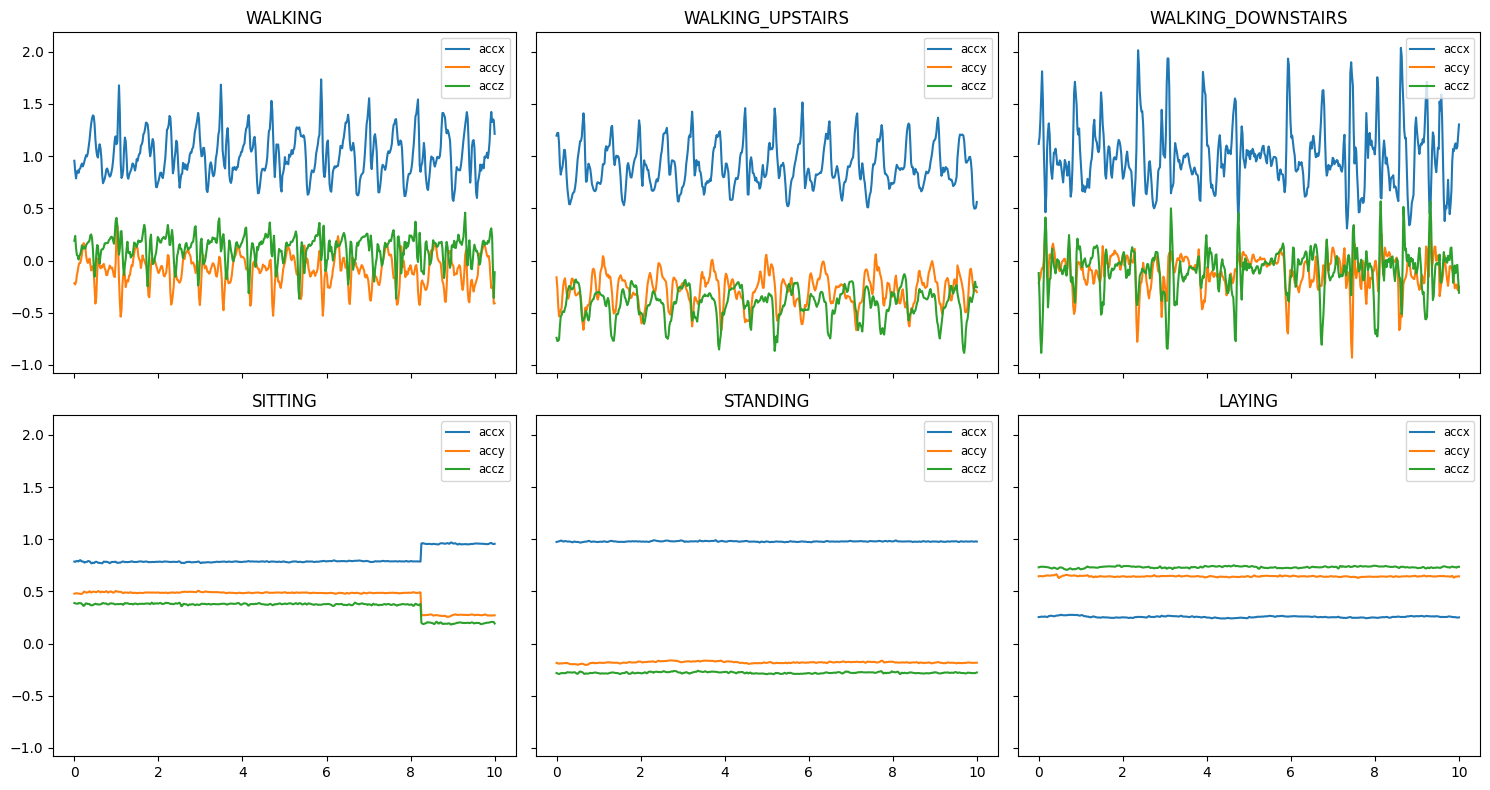

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=True)
t = np.linspace(0, 10, 500)

for cnt, (label_id, label_name) in enumerate(Activity_Classes.items()):
    axis = axes[cnt // 3, cnt % 3]
    
    # find first sample with this activity label
    idx = np.where(y_train == label_id)[0][0]
    
    x_axis = X_train[idx, :, 0]
    y_axis = X_train[idx, :, 1]
    z_axis = X_train[idx, :, 2]
    
    axis.plot(t, x_axis, label="accx")
    axis.plot(t, y_axis, label="accy")
    axis.plot(t, z_axis, label="accz")
    axis.set_title(label_name)
    axis.legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()

### Observations:

**Differences:**
- **Static activities** (SITTING, STANDING, LAYING): Show relatively flat, stable signals with minimal fluctuation
- **Dynamic activities** (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS): Show periodic oscillating patterns due to repetitive motion

**Similarities:**
- All static activities have similar low-variance patterns, making them harder to distinguish from each other
- Walking activities all show periodic patterns but with different frequencies and amplitudes

**Can the model classify activities?**
- **Yes**, the model should be able to distinguish between static and dynamic activities easily due to clear differences in variance/amplitude
- Distinguishing between different walking activities (upstairs vs downstairs) may be more challenging as patterns are similar
- Distinguishing between static activities (sitting vs standing vs laying) may also be challenging




---

## Question 2: Do you think we need a machine learning model to differentiate between static activities and dynamic activities?

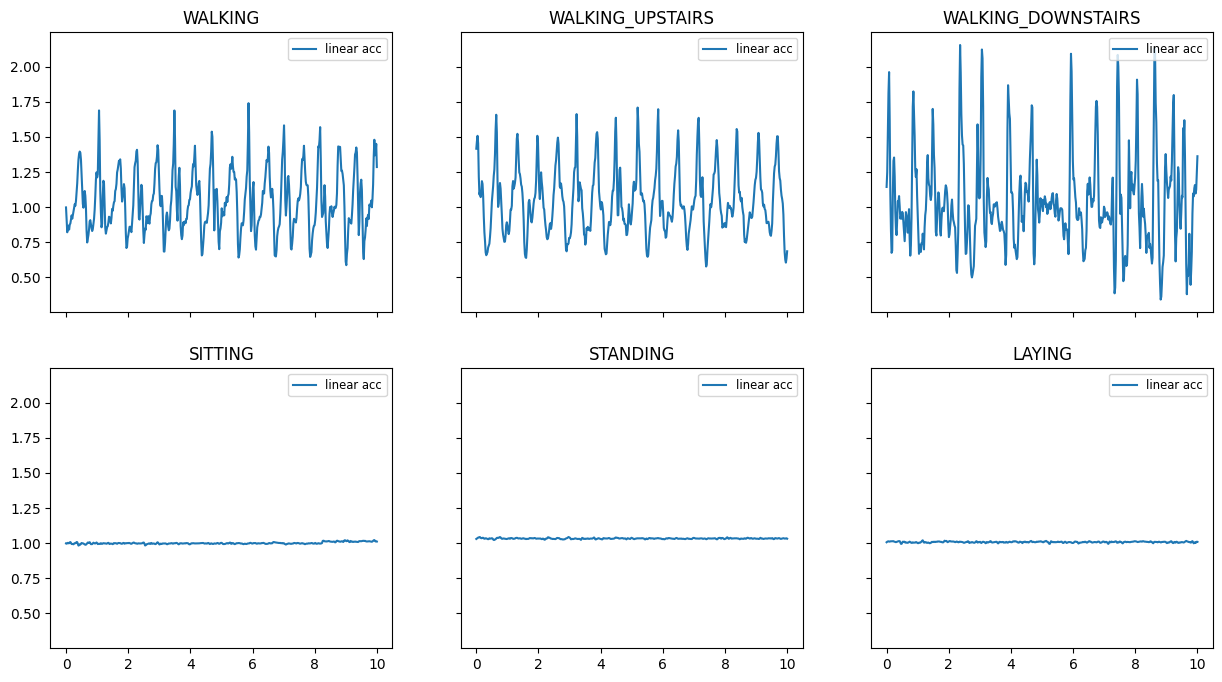

In [3]:
# linear acceleration

fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=True)
t = np.linspace(0, 10, 500)

for cnt, (label_id, label_name) in enumerate(Activity_Classes.items()):
    axis = axes[cnt // 3, cnt % 3]
    
    # find first sample with this activity label
    idx = np.where(y_train == label_id)[0][0]
    
    x_axis = X_train[idx, :, 0]
    y_axis = X_train[idx, :, 1]
    z_axis = X_train[idx, :, 2]
    
    axis.plot(t, np.sqrt(x_axis**2+y_axis**2+z_axis**2), label="linear acc")
    axis.set_title(label_name)
    axis.legend(loc='upper right', fontsize='small')


## Ans:
**No**, we don't need a machine learning model to differentiate between static and dynamic activities.

**Justification:**
- For **static activities** , the total acceleration magnitude 
  $\sqrt{acc_x^2 + acc_y^2 + acc_z^2} \approx 1g$ and remains nearly constant (low variance), because the accelerometer only measures the acc due to gravity at stationary state

- For **dynamic activities**, the magnitude oscillates significantly (high variance)

A simple threshold-based rule on variance or standard deviation can reliably classify:

```if std(total_acc) > threshold = Dynamic, else = Static```

---

## Question 3: Visualize the data using PCA

- PCA on Total Acceleration: To compress the acceleration time series into 2 features (dimensions).

- PCA on the total Acc
    - There is 1 data sample (one recording window) of a person doing a single activity. This single sample contains 500 time steps (dimensions).
    - If we compress these 500 time steps down to 2 Principal Components (coordinates) $\rightarrow$ we get 2 numbers ($x, y$) that represent that entire recording.
    - This helps the human eye find patterns in a scatter plot.
        - Correction: It’s not that we had "500 dots" before. It is that we had 1 dot existing in a 500-dimensional invisible space. We physically cannot see 500 dimensions.
    
    - By compressing it to 2 dimensions, we can now project that 1 dot onto a flat 2D screen. This allows us to check if the "dots" for static activities (Sitting) are visibly separated from the "dots" for dynamic activities (Walking).

    - So this helps in EDA.

## PCA
- Standardization ($\mu=0, \sigma=1$)
- Covariance Matrix
- Find Eigen Values and Vectors
- Sort and Select Comps
- Project the new onto new subspace (tranoformation $Y=XW$)

In [ ]:
# using covaraiance matrix method as above is not used in data analysis bcz calculating covariance matrix for large datasets is computationally expensive and may not be feasible for real-time applications.
# so we use sklearn lib, which uses SVD method internally to compute principal components efficiently. wihtout needing the space and time complexity of covariance matrix calculation.


